In [ ]:
!pip3 install news-please

In [2]:
import pandas as pd
import requests
import time
import newsplease
from tqdm import tqdm
import json
import os
from newsplease import NewsPlease
from urllib.parse import urlparse

## Descriptive stats

In [ ]:
# load categorised data by media ideological affiliation
df = pd.read_csv('C:/Users/analo/OneDrive - UvA/Project/Data/Mediacloud urls/Data_modified.csv')
df.head()  

In [4]:
domain = df['type2'].value_counts()
pd.DataFrame(domain)

,type2
liberal,773
conservative,570
moderate,331


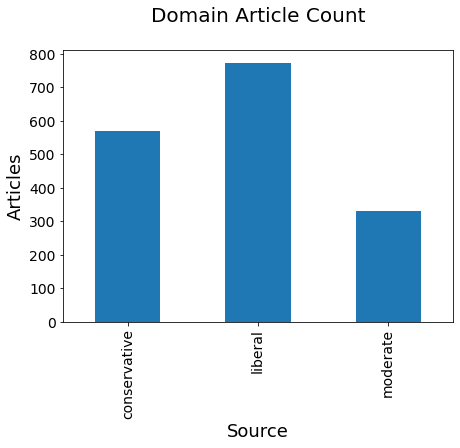

In [5]:
ax = domain.sort_index().plot(kind='bar', fontsize=14, figsize=(7,5)) # Counting articles per news source
ax.set_title('Domain Article Count\n', fontsize=20)
ax.set_xlabel('Source', fontsize=18)
ax.set_ylabel('Articles', fontsize=18);

Fetching stories from a txt file containing all URLs (each line containing a single URL)

In [43]:
# clean dataframe a bit
df = data.drop(columns=['date_modify', 'date_download', 'filename', 'image_url', 'language', 'localpath', 'text', 'title_page', 'title_rss', 'authors', 'url','description']) # Remove columns

In [48]:
df["Date"] = pd.to_datetime(df["date_publish"])
df.head()

,date_publish,maintext,source_domain,title,Date
0,2020-09-03 14:01:50,NEW You can now listen to Fox News articles!\n...,www.foxnews.com,Arnold Schwarzenegger offers to pay for reopen...,2020-09-03 14:01:50
1,2020-07-23 06:00:01,"With the death of Congressman John Lewis, Amer...",www.newsweek.com,"MLK III: In the Name of John Lewis, Let Us Res...",2020-07-23 06:00:01
2,2020-09-28 18:33:10,NEW You can now listen to Fox News articles!\n...,www.foxnews.com,Wisconsin voters win protection against strict...,2020-09-28 18:33:10
3,2020-02-13 21:31:08,The decree will be enforced by a federal court...,www.nytimes.com,North Dakota Tribes Score Key Voting Rights Vi...,2020-02-13 21:31:08
4,2020-11-05 03:03:39,With concerns mounting over how the country ca...,www.nytimes.com,Trump Is Pushing a False Argument on Vote-by-M...,2020-11-05 03:03:39
